Для проекта используются данные о продажах ресторанной компании, работающей в нескольких городах мира. Они содержат информацию об отдельных транзакциях, демографические данные клиентов и информацию о продуктах. Данные структурированы в табличном формате, где каждая строка представляет собой отдельную запись, а каждый столбец — определенный атрибут. Этот набор данных может широко использоваться для бизнес-аналитики, прогнозирования продаж и анализа поведения клиентов.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitgrewal/restaurant-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/restaurant-sales-data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl

## Предварительный анализ и очистка данных

In [3]:
df = pd.read_csv(path + '/9. Sales-Data-Analysis.csv')
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


**Описание столбцов с Kaggle:**

These are the main Features/Columns available in the dataset :

1) Order ID: A unique identifier for each sales order. This can be used to track individual transactions.

2) Order Date: The date when the order was placed. This column is essential for time-series analysis, such as identifying sales trends over time or seasonality.

3) Product: The name or type of the product sold. This column is crucial for analyzing sales performance by product category.

4) Price : The unit price of the product. This, along with 'Quantity Ordered', is used to calculate the total price of each order.

5) Quantity : The number of units of the product sold in a single order. This is a key metric for calculating revenue and understanding sales volume.

6) Purchase Type : The order was made online or in-store or drive-thru.

7) Payment Method : How the payment for the order was done.

8) Manager : Name of the manager of the store.

9) City : The location of the store. This can be used for geographical analysis of sales, such as identifying top-performing regions or optimizing logistics.

In [4]:
print('Общая информация о датасете:')
df.info()

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [5]:
print("Пропущенные значения:\n", df.isnull().sum())

Пропущенные значения:
 Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64


In [6]:
df['Product'].unique()

array(['Fries', 'Beverages', 'Sides & Other', 'Burgers',
       'Chicken Sandwiches'], dtype=object)

In [7]:
df['Purchase Type'].unique()

array(['Online ', 'In-store ', 'Drive-thru '], dtype=object)

In [8]:
df['Payment Method'].unique()

array([' Gift Card', ' Credit Card', ' Cash'], dtype=object)

In [9]:
df['Manager'].unique()

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [10]:
df['City'].unique()

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

Необходимо очистить значения от лишних пробелов

In [11]:
df['Purchase Type'] = df['Purchase Type'].str.strip()
df['Payment Method'] = df['Payment Method'].str.strip()

In [12]:
print(f"Purchase Types: {df['Purchase Type'].unique()} \nPayment Methods: {df['Payment Method'].unique()}")

Purchase Types: ['Online' 'In-store' 'Drive-thru'] 
Payment Methods: ['Gift Card' 'Credit Card' 'Cash']


In [13]:
df['Manager'] = df['Manager'].str.strip().str.replace(r'\s+', ' ', regex=True)

Чтобы убрать двойные пробелы используется регулярное выражение (r'\s+', ' ', regex=True), где \s+ - любой пробельный символ (включая пробел, табуляцию) с одним и более повторением - заменяется на один пробел.

Опция regex=True указывает, что первый аргумент — это именно регулярное выражение, а не просто строка для замены.

In [14]:
df['Manager'].unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [15]:
df.head(15)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
5,10457,08-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris
6,10459,08-11-2022,Sides & Other,4.99,200.40,In-store,Credit Card,Walter Muller,Berlin
7,10460,09-11-2022,Burgers,12.99,554.27,In-store,Credit Card,Remy Monet,Paris
8,10461,09-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Remy Monet,Paris
9,10462,09-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris


In [16]:
df.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


Поле "Quantity" показывает количество продукта, который продали в заказе, он должен быть целым числом, а не дробным как сейчас. Проведем преобразования, чтобы сделать количество целым числом

In [17]:
df['Quantity'] = df['Quantity'].round()

In [18]:
df.Quantity

,Quantity
0,573.0
1,746.0
2,200.0
3,570.0
4,201.0
...,...
249,200.0
250,754.0
251,281.0
252,630.0


In [19]:
df['Quantity'] = df['Quantity'].astype(int)

In [20]:
df.Quantity

,Quantity
0,573
1,746
2,200
3,570
4,201
...,...
249,200
250,754
251,281
252,630


In [21]:
df['Date'].unique()

array(['07-11-2022', '08-11-2022', '09-11-2022', '10-11-2022',
       '11-11-2022', '12-11-2022', '13-11-2022', '14-11-2022',
       '15-11-2022', '16-11-2022', '17-11-2022', '18-11-2022',
       '19-11-2022', '20-11-2022', '21-11-2022', '22-11-2022',
       '23-11-2022', '24-11-2022', '25-11-2022', '26-11-2022',
       '27-11-2022', '28-11-2022', '29-11-2022', '30-11-2022',
       '01-12-2022', '02-12-2022', '03-12-2022', '04-12-2022',
       '05-12-2022', '06-12-2022', '07-12-2022', '08-12-2022',
       '09-12-2022', '10-12-2022', '11-12-2022', '12-12-2022',
       '13-12-2022', '14-12-2022', '15-12-2022', '16-12-2022',
       '17-12-2022', '18-12-2022', '19-12-2022', '20-12-2022',
       '21-12-2022', '22-12-2022', '23-12-2022', '24-12-2022',
       '25-12-2022', '26-12-2022', '27-12-2022', '28-12-2022',
       '29-12-2022'], dtype=object)

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin
5,10457,2022-08-11,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris
6,10459,2022-08-11,Sides & Other,4.99,200,In-store,Credit Card,Walter Muller,Berlin
7,10460,2022-09-11,Burgers,12.99,554,In-store,Credit Card,Remy Monet,Paris
8,10461,2022-09-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Remy Monet,Paris
9,10462,2022-09-11,Fries,3.49,573,In-store,Credit Card,Remy Monet,Paris


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 18.0+ KB


## Анализ данных

### **1. Самый популярный метод оплаты**

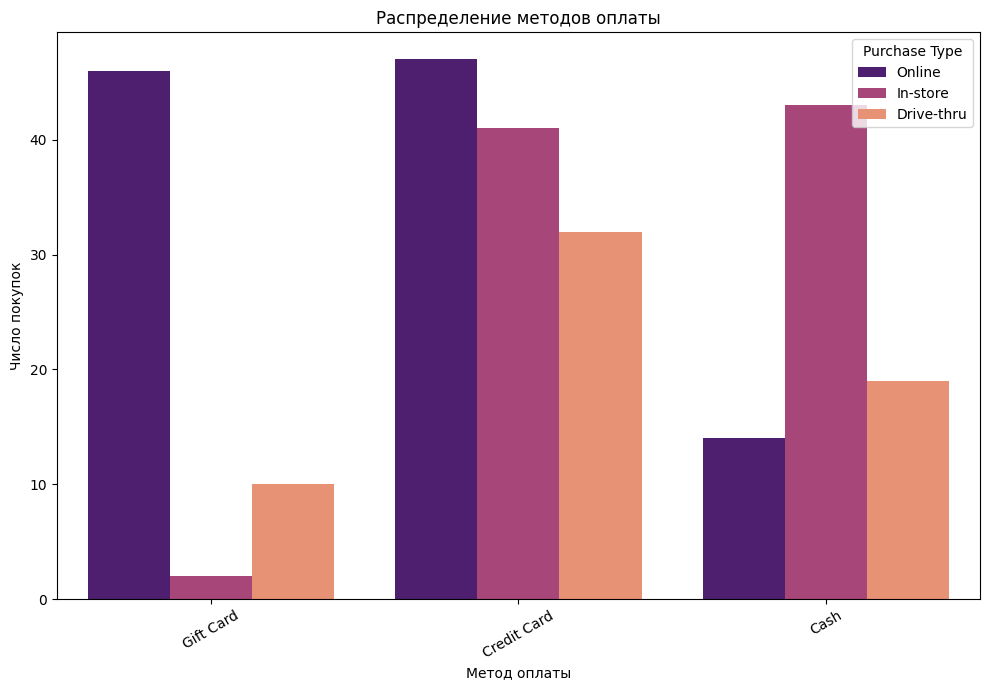

In [41]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Payment Method', palette='magma', hue = 'Purchase Type', legend=True)
plt.title('Распределение методов оплаты')
plt.xlabel('Метод оплаты')
plt.ylabel('Число покупок')
plt.xticks(rotation=30)  # Поворачивать подписи, если они длинные
plt.tight_layout() # Регулировать отступы между сабплотами
plt.show()

### **2. Город с самой большой выручкой**

In [25]:
df['Total Sales'] = df['Price'] * df['Quantity']

In [26]:
city_sales = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False).reset_index() # reset_index() позволяет убрать лаг в тайтле
city_sales

,City,Total Sales
0,Lisbon,241635.49
1,London,211160.04
2,Madrid,136154.24
3,Berlin,100572.34
4,Paris,79777.33


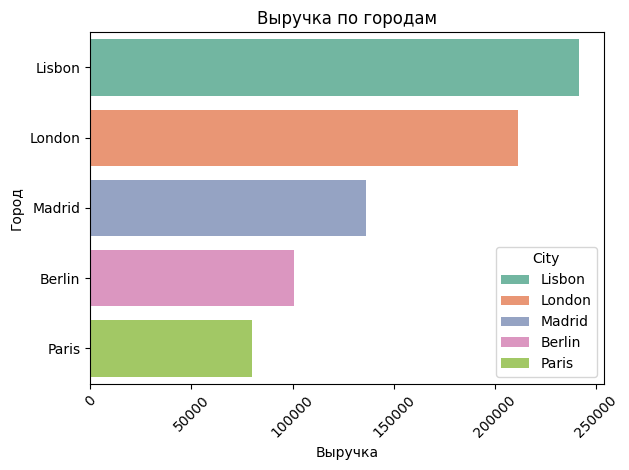

In [27]:
sns.barplot(data = city_sales, x = 'Total Sales', y = 'City', palette = 'Set2', hue = 'City', legend=True)
plt.title('Выручка по городам')
plt.xlabel('Выручка')
plt.ylabel('Город')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **3. Изменение выручки по времени**

In [28]:
sales_over_time = df.groupby('Date')['Total Sales'].sum().reset_index()
sales_over_time

,Date,Total Sales
0,2022-01-12,13401.89
1,2022-02-12,13990.52
2,2022-03-12,13990.52
3,2022-04-12,9001.56
4,2022-05-12,14194.28
5,2022-06-12,13999.43
6,2022-07-11,5198.47
7,2022-07-12,13990.52
8,2022-08-11,12402.02
9,2022-08-12,14198.36


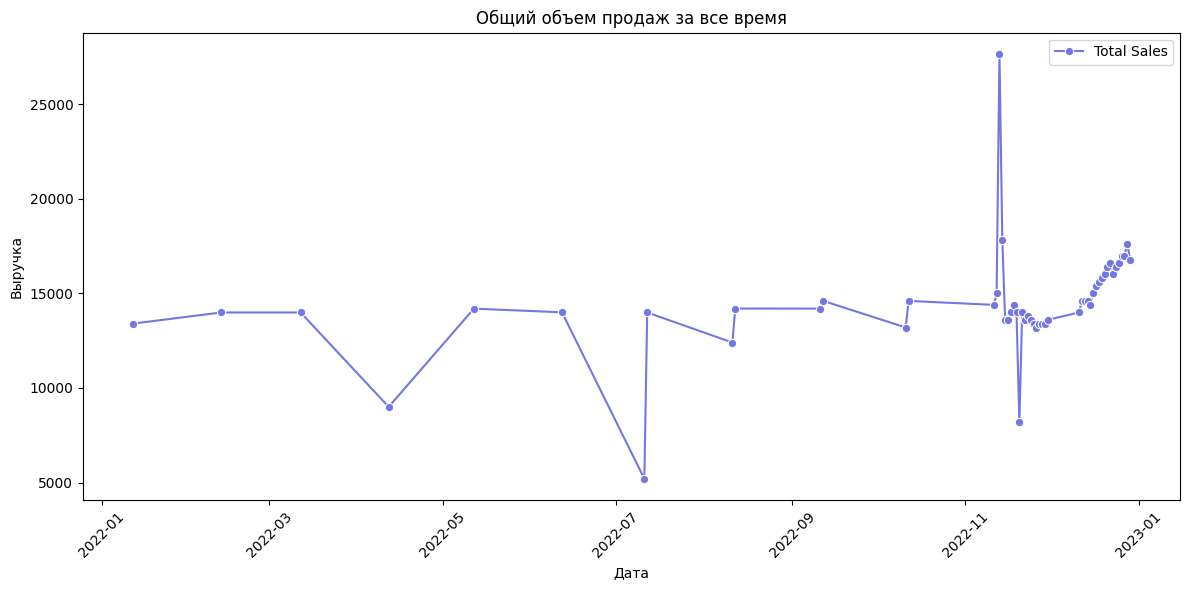

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Total Sales', marker='o', color='#7377E1', label='Total Sales')
plt.title('Общий объем продаж за все время')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **4. Самый продаваемый продукт**

In [30]:
quantity_sold_products = df.groupby('Product')['Quantity'].sum().reset_index()
quantity_sold_products

,Product,Quantity
0,Beverages,34988
1,Burgers,29018
2,Chicken Sandwiches,11133
3,Fries,32023
4,Sides & Other,9800


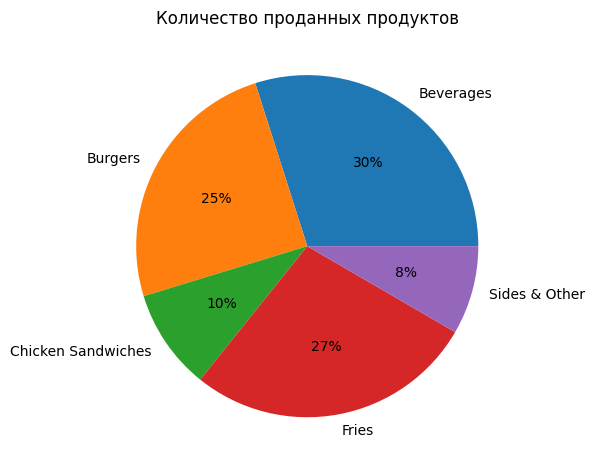

In [31]:
plt.pie(x=quantity_sold_products['Quantity'], labels=quantity_sold_products['Product'], autopct = '%1.f%%')
plt.title('Количество проданных продуктов')
plt.tight_layout()
plt.show()

### **5. Какой процент выручки приносит каждый продукт**

In [32]:
revenue_products = df.groupby('Product')['Total Sales'].sum().reset_index()
revenue_products

,Product,Total Sales
0,Beverages,103214.60
1,Burgers,376943.82
2,Chicken Sandwiches,114612.45
3,Fries,125626.57
4,Sides & Other,48902.00


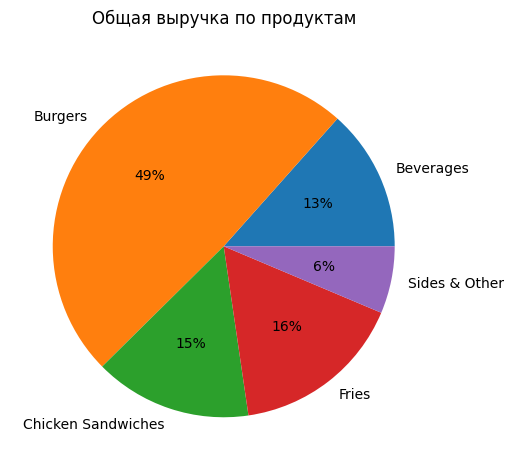

In [33]:
plt.pie(x=revenue_products['Total Sales'], labels=revenue_products['Product'], autopct = '%1.f%%')
plt.title('Общая выручка по продуктам')
plt.tight_layout()
plt.show()

### **6. Принадлежность менеджера городу и общее количество заказов по ним**

In [34]:
# в текущем датасете реализована простая логика Один город - Один менеджер, поэтому использую first(), если менеджеров несколько необходимо использовать unique(), чтобы вывести лист менеджеров
city_managers = df.groupby('City')['Manager'].first().reset_index()
city_managers

,City,Manager
0,Berlin,Walter Muller
1,Lisbon,Joao Silva
2,London,Tom Jackson
3,Madrid,Pablo Perez
4,Paris,Remy Monet


In [35]:
count_sales = df.groupby('Manager')['Order ID'].count().reset_index()
count_sales.rename(columns={'Order ID': 'Sales Count'}, inplace=True)
count_sales

,Manager,Sales Count
0,Joao Silva,75
1,Pablo Perez,46
2,Remy Monet,28
3,Tom Jackson,75
4,Walter Muller,30


In [36]:
city_managers = city_managers.merge(count_sales, how='inner', on='Manager')
city_managers

,City,Manager,Sales Count
0,Berlin,Walter Muller,30
1,Lisbon,Joao Silva,75
2,London,Tom Jackson,75
3,Madrid,Pablo Perez,46
4,Paris,Remy Monet,28
